In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


In [3]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt



transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab notebooks/data', train = True, download = True, transform = transform)
test_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab notebooks/data', train = False, download = True, transform = transform)

In [4]:
print(train_DS)
print(test_DS)
print(len(train_DS))
print(len(test_DS))



Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Colab notebooks/data
    Split: Test
    StandardTransform
Transform: ToTensor()
60000
10000


In [5]:
train_DS.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

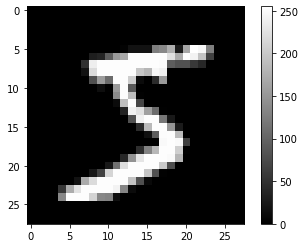

In [6]:
plt.imshow(train_DS.data[0], cmap= "gray")
plt.colorbar()

In [7]:
train_DS.targets[0]

tensor(5)

# DataLoader 구경

In [8]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size = BATCH_SIZE, shuffle = True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size = BATCH_SIZE, shuffle = True)

torch.Size([32, 1, 28, 28])
torch.Size([32])


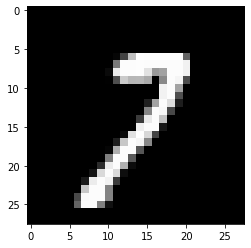

In [9]:
images, label = next(iter(train_DL))
print(images.shape)
print(label.shape)
plt.imshow(images[0].squeeze(),cmap="gray")

In [10]:
from torch import nn, optim
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fcs = nn.Sequential(nn.Linear(28*28,30),
                                 nn.ReLU(), #  nn.Sigmoid(),
                                 nn.Linear(30,10))
        
    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.fcs(x)
        return x

In [11]:
# flatten 확인
images, label = next(iter(train_DL))
print(images.shape)
flat_images=torch.flatten(images)
print(flat_images.shape)
flat_images2=torch.flatten(images, start_dim=1)
print(flat_images2.shape)

torch.Size([32, 1, 28, 28])
torch.Size([25088])
torch.Size([32, 784])


In [12]:
model = MLP()
print(model(images).shape)

torch.Size([32, 10])


In [13]:
from torch import optim
import torch.nn.functional as F

LR = 1e-3
EPOCH = 5


def Train(model, train_DL):
    optimizer = optim.Adam(model.parameters(), lr = LR)

    loss_history = []
    NoT = len(train_DL.dataset) # The Number of training data
    model.train() # train mode로 전환
    for ep in range(EPOCH) :
        rloss = 0
        for x_batch, y_batch in train_DL : 
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            #inference
            y_hat = model(x_batch)

            # loss
            loss = F.cross_entropy(y_hat,y_batch)
                
            # update
            optimizer.zero_grad() # 초기화(위치 상관 없음)
            loss.backward() # 미분 구하기
            optimizer.step() # 수식에 의한 업데이트

            #loss accumulation
            loss_b = loss.item() * x_batch.shape[0] # batch loss # BATCH_SIZE를 곱하면 18개도 32를 곱하니깐..
            rloss+= loss_b
        # print loss
        loss_e = rloss / NoT
        loss_history += [loss_e] # item 안쓰면 tensor(0.5), 쓰면 그냥 0.5
        print(f"Epoch:{ep+1}, train loss : {round(loss_e,3)}")
        print("-"*20)
    return loss_history
            

# cross entropy 확인

In [20]:
# cross entropy 여러가지 방법
input = torch.randn(3,5)
print(input)
target = torch.randint(5,(3,))
print(target)

# 방법 1
loss = F.cross_entropy(input,target)
print(loss)

#방법2
input_soft = F.softmax(input, dim=1)
print(input_soft)

loss2 = 0

for i, val in enumerate(input_soft) :
    print(i,val)
    loss2 += -torch.log(val[target[i]])
loss2 = loss2 / input.shape[0]
print(loss2)


# 방법 3
criterion = nn.CrossEntropyLoss()
print(criterion(input,target))


tensor([[ 1.1138, -1.3290, -1.1983,  1.5888,  1.0869],
        [-1.5387, -0.4489,  0.6680,  0.1398, -1.4257],
        [ 1.3788, -0.6656, -1.6649,  2.2113,  0.9663]])
tensor([2, 3, 0])
tensor(2.1175)
tensor([[0.2654, 0.0231, 0.0263, 0.4268, 0.2584],
        [0.0512, 0.1522, 0.4651, 0.2742, 0.0573],
        [0.2417, 0.0313, 0.0115, 0.5556, 0.1600]])
0 tensor([0.2654, 0.0231, 0.0263, 0.4268, 0.2584])
1 tensor([0.0512, 0.1522, 0.4651, 0.2742, 0.0573])
2 tensor([0.2417, 0.0313, 0.0115, 0.5556, 0.1600])
tensor(2.1175)
tensor(2.1175)


#훈련하기

In [21]:
model = MLP().to(DEVICE)
loss_history = Train(model, train_DL)

Epoch:1, train loss : 0.398
--------------------
Epoch:2, train loss : 0.224
--------------------
Epoch:3, train loss : 0.178
--------------------
Epoch:4, train loss : 0.151
--------------------
Epoch:5, train loss : 0.131
--------------------


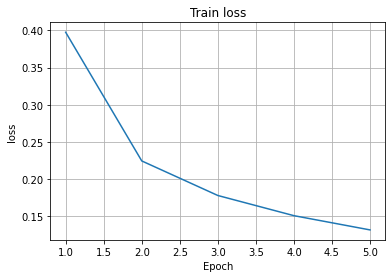

In [24]:
plt.plot(range(1, EPOCH+1), loss_history)
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title("Train loss")
plt.grid()

#모델 저장하기 & 불러오기

In [26]:
save_model_path = "/content/drive/MyDrive/Colab notebooks/data/results/MLP_MNIST.pt"
torch.save(model.state_dict(), save_model_path)


In [27]:
load_model = MLP().to(DEVICE)
load_model.load_state_dict(torch.load(save_model_path, map_location = DEVICE)) # map_loaction 있어야 GPU로 학습했던 것 현재 device로 불러올 수 있음.


<All keys matched successfully>

In [44]:
def Test(model, test_DL):
    NoTes = len(test_DL.dataset)

    model.eval()
    with torch.no_grad():
        rcorrect = 0
        for x_batch, y_batch in test_DL :
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)

            #inference
            y_hat = model(x_batch)
            #print(y_hat.shape)
            #accuracy
            pred = y_hat.argmax(dim = 1) #softmax 하던 안하던 결과는 똑같음.
            
            #print(pred)
            # print(y_batch)
            corrects_b = torch.sum(pred == y_batch).item()
            rcorrect += corrects_b
            #print(corrects_b)
        test_acc = rcorrect/NoTes * 100

    print(f"Test accuracy : {rcorrect} / {NoTes} ({round(test_acc,1)}) %")




Test accuracy : 9593 / 10000 (95.9) %


In [45]:
Test(load_model, test_DL)

Test accuracy: 9593 / 10000 (95.9) %


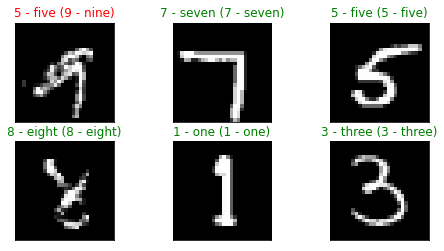

In [55]:
load_model.eval()
with torch.no_grad():
    x_batch, y_batch = next(iter(test_DL))
    x_batch = x_batch.to(DEVICE)
    y_hat = model(x_batch)
    pred = y_hat.argmax(dim = 1)

x_batch = x_batch.to("cpu")
pred = pred.to("cpu")

plt.figure(figsize = (8,4))
for idx in range(6) :
    plt.subplot(2,3, idx+1, xticks = [], yticks = [])
    plt.imshow(x_batch[idx,0,...], cmap = "gray")
    pred_class = test_DL.dataset.classes[pred[idx].item()]
    true_class = test_DL.dataset.classes[y_batch[idx].item()]
    plt.title(f"{pred_class} ({true_class})", color = "g" if pred_class == true_class else "r")

In [56]:
num = 0
for param in load_model.parameters():
    if param.requires_grad:
        num+=param.numel()
print(num)

23860
